In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
data = pd.read_csv("C:/Users/xavir/Python/Canciones/master_song_data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Participant_ID                206 non-null    int64  
 1   Song_name                     206 non-null    object 
 2   Artist                        206 non-null    object 
 3   Spotify_ID                    206 non-null    object 
 4   Loudness                      206 non-null    float64
 5   Valence                       206 non-null    float64
 6   Danceability                  206 non-null    float64
 7   Acousticness                  206 non-null    float64
 8   Instrumental                  206 non-null    float64
 9   Audio_class                   206 non-null    object 
 10  Lyrics                        206 non-null    object 
 11  Sentiment_class               206 non-null    object 
 12  Audio + Lyrics analysis       206 non-null    object 
 13  Total

In [5]:
data = data.iloc[: , [0,1,2,4,5,6,7,9,11,12,13,14]]

data.head()

,Participant_ID,Song_name,Artist,Loudness,Valence,Danceability,Acousticness,Audio_class,Sentiment_class,Audio + Lyrics analysis,Total_mental_health,Mental_health_severity_class
0,2,Here again,Elevation Worship,-8.210,0.103,0.124,0.0128,Sad,Positive,Sad,8,Low
1,2,The Stand,Hillsong United,-8.128,0.133,0.449,0.1470,Sad,Positive,Sad,8,Low
2,2,Here I Bow,Brian Johnson,-7.395,0.218,0.389,0.6780,Sad,Positive,Sad,8,Low
3,3,On my way,Alan Walker,-5.952,0.295,0.616,0.0480,Tense,Positive,"Exciting,Disturbing",15,Med
4,3,Bad guy,Billie Eilish,-10.965,0.562,0.701,0.3280,Relax,Positive,Relax,15,Med


In [7]:
audio_class_mapping = {
    'Sad': 1,
    'Tense': 2,
    'Relax': 3,
    'Happy': 4
}
data['Audio_class_numeric'] = data['Audio_class'].map(audio_class_mapping)

data.head()

,Participant_ID,Song_name,Artist,Loudness,Valence,Danceability,Acousticness,Audio_class,Sentiment_class,Audio + Lyrics analysis,Total_mental_health,Mental_health_severity_class,Audio_class_numeric
0,2,Here again,Elevation Worship,-8.210,0.103,0.124,0.0128,Sad,Positive,Sad,8,Low,1
1,2,The Stand,Hillsong United,-8.128,0.133,0.449,0.1470,Sad,Positive,Sad,8,Low,1
2,2,Here I Bow,Brian Johnson,-7.395,0.218,0.389,0.6780,Sad,Positive,Sad,8,Low,1
3,3,On my way,Alan Walker,-5.952,0.295,0.616,0.0480,Tense,Positive,"Exciting,Disturbing",15,Med,2
4,3,Bad guy,Billie Eilish,-10.965,0.562,0.701,0.3280,Relax,Positive,Relax,15,Med,3


In [8]:
X = data[['Loudness', 'Valence', 'Danceability', 'Acousticness']]
y = data['Audio_class_numeric']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           1      0.955     1.000     0.977        21
           2      1.000     0.750     0.857         4
           3      1.000     0.889     0.941         9
           4      0.889     1.000     0.941         8

    accuracy                          0.952        42
   macro avg      0.961     0.910     0.929        42
weighted avg      0.956     0.952     0.951        42



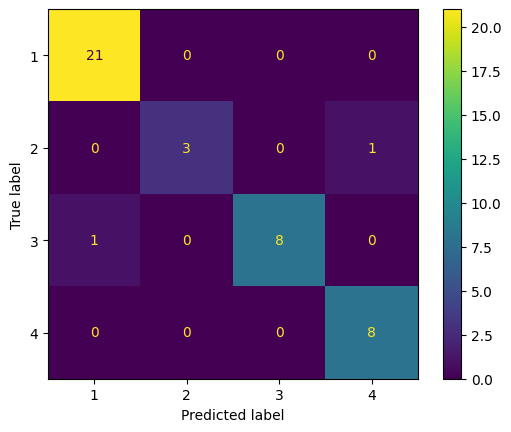

In [12]:
mdl_lrg = LogisticRegression(max_iter=10000000)
mdl_lrg.fit(X_train, y_train)
Y_pred = mdl_lrg.predict(X_test)
prediction_lRegression = np.array(Y_pred)
print(metrics.classification_report(y_test, prediction_lRegression, labels=mdl_lrg.classes_, digits=3))
cm = metrics.confusion_matrix(y_test, prediction_lRegression, labels=mdl_lrg.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_lrg.classes_)
disp.plot()

In [13]:
data['Predicted_Audio_Class'] = mdl_lrg.predict(X)

In [31]:
def recomendar_cancion(estado_depresion):
    if estado_depresion == 'severe':
        recomendaciones = data[data['Predicted_Audio_Class'] == 4]
    elif estado_depresion == 'moderate':
        recomendaciones = data[data['Predicted_Audio_Class'].isin([3, 4])]
    elif estado_depresion == 'mild':
        recomendaciones = data[data['Predicted_Audio_Class'].isin([2, 3, 4])]
    elif estado_depresion == 'no depression':
        recomendaciones = data
    
    if not recomendaciones.empty:
        cancion_recomendada = recomendaciones[['Song_name', 'Artist']].sample(1)
        return cancion_recomendada.to_dict('records')[0]
    else:
        return "No hay canciones que cumplan con los criterios de recomendación."

In [61]:
estado_depresion = 'mild'
cancion_recomendada = recomendar_cancion(estado_depresion)
print(cancion_recomendada)

{'Song_name': 'I Feel It Coming', 'Artist': 'The Weeknd'}
